### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. 

Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, 

I do not want the coupon’ are labeled as ‘Y = 0’.

There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [75]:
df = pd.read_csv('data/coupons.csv')

In [76]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [77]:
df.info() # check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

For the numerical columns, print the counts, means, and median values

In [26]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    counts = df[column].count()
    average = df[column].mean()
    median = df[column].median()
    print(f"Column: {column}")
    print(f"Counts: {counts}")
    print(f"Average: {average}")
    print(f"Median: {median}")
    print()


Column: temperature
Counts: 12684
Average: 63.301797540208135
Median: 80.0

Column: has_children
Counts: 12684
Average: 0.4141438032166509
Median: 0.0

Column: toCoupon_GEQ5min
Counts: 12684
Average: 1.0
Median: 1.0

Column: toCoupon_GEQ15min
Counts: 12684
Average: 0.5614947965941344
Median: 1.0

Column: toCoupon_GEQ25min
Counts: 12684
Average: 0.11912645853043204
Median: 0.0

Column: direction_same
Counts: 12684
Average: 0.21475875118259224
Median: 0.0

Column: direction_opp
Counts: 12684
Average: 0.7852412488174078
Median: 1.0

Column: Y
Counts: 12684
Average: 0.5684326710816777
Median: 1.0



The 'car', 'toCoupon_GEQ5min', 'toCoupon_GEQ25min' columns need a closer look.

In [29]:
print(df['car'].value_counts())
print('\n')
print(df['toCoupon_GEQ5min'].value_counts())
print('\n')
print(df['toCoupon_GEQ25min'].value_counts())
print('\n')


car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64


toCoupon_GEQ5min
1    12684
Name: count, dtype: int64


toCoupon_GEQ25min
0    11173
1     1511
Name: count, dtype: int64




3. Decide what to do about your missing data -- drop, replace, other...

The 'car' and 'toCoupon_GEQ5min' columns are useless, so drop them. 

In [30]:
df = df.drop('car', axis=1)
df = df.drop('toCoupon_GEQ5min', axis=1)


Now display the categorical values of each of the Dtype = Object columns.
In other words, list the text values that are in columns such as Destination, Passanger, etc.

In [31]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(df[column].astype(str).value_counts())
        print('\n')




destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64


passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64


weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64


time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64


coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


expiration
1d    7091
2h    5593
Name: count, dtype: int64


gender
Female    6511
Male      6173
Name: count, dtype: int64


age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64


maritalStatus
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed   

For each of the categorical columns, change the values into a number so that we can use correlation methods

In [85]:
object_columns = df.select_dtypes(include=['object']).columns
categorical_mapping = {}

for column in object_columns:
    unique_values = df[column].unique()
    mapping = {value: index for index, value in enumerate(unique_values)}
    categorical_mapping[column] = mapping

categorical_mapping

{'destination': {'No Urgent Place': 0, 'Home': 1, 'Work': 2},
 'passanger': {'Alone': 0, 'Friend(s)': 1, 'Kid(s)': 2, 'Partner': 3},
 'weather': {'Sunny': 0, 'Rainy': 1, 'Snowy': 2},
 'time': {'2PM': 0, '10AM': 1, '6PM': 2, '7AM': 3, '10PM': 4},
 'coupon': {'Restaurant(<20)': 0,
  'Coffee House': 1,
  'Carry out & Take away': 2,
  'Bar': 3,
  'Restaurant(20-50)': 4},
 'expiration': {'1d': 0, '2h': 1},
 'gender': {'Female': 0, 'Male': 1},
 'age': {'21': 0,
  '46': 1,
  '26': 2,
  '31': 3,
  '41': 4,
  '50plus': 5,
  '36': 6,
  'below21': 7},
 'maritalStatus': {'Unmarried partner': 0,
  'Single': 1,
  'Married partner': 2,
  'Divorced': 3,
  'Widowed': 4},
 'education': {'Some college - no degree': 0,
  'Bachelors degree': 1,
  'Associates degree': 2,
  'High School Graduate': 3,
  'Graduate degree (Masters or Doctorate)': 4,
  'Some High School': 5},
 'occupation': {'Unemployed': 0,
  'Architecture & Engineering': 1,
  'Student': 2,
  'Education&Training&Library': 3,
  'Healthcare Suppo

Now, use this dictionary to replace the categorical (text) values with the numerical values.

In [36]:
df = df.replace(categorical_mapping)

Create a correlation heatmap of the 'Y' variable to all others

In [62]:
plt.figure(figsize=(12, 12))
df_corr = df.corr()['Y'].sort_values(ascending=False)
print(df_corr)





Y                       1.000000
CoffeeHouse             0.113910
Bar                     0.066321
temperature             0.061240
passanger               0.051614
gender                  0.043969
income                  0.017721
direction_same          0.014570
Restaurant20To50        0.004680
RestaurantLessThan20   -0.001537
occupation             -0.007894
direction_opp          -0.014570
education              -0.031078
maritalStatus          -0.035965
age                    -0.038154
has_children           -0.045557
CarryAway              -0.050546
toCoupon_GEQ15min      -0.081602
weather                -0.096949
toCoupon_GEQ25min      -0.103633
time                   -0.112023
destination            -0.119311
expiration             -0.129920
coupon                 -0.146287
Name: Y, dtype: float64


<Figure size 1200x1200 with 0 Axes>

4. What proportion of the total observations chose to accept the coupon? 



NOTE: Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, 

In [131]:
proportion = df['Y'].value_counts(normalize=True)
percentage = proportion.iloc[1] * 100
print(f"Proportion of population that chose the coupon: {percentage:.2f}%")


Proportion of population that chose the coupon: 43.16%


5. Use a bar plot to visualize the `coupon` column.

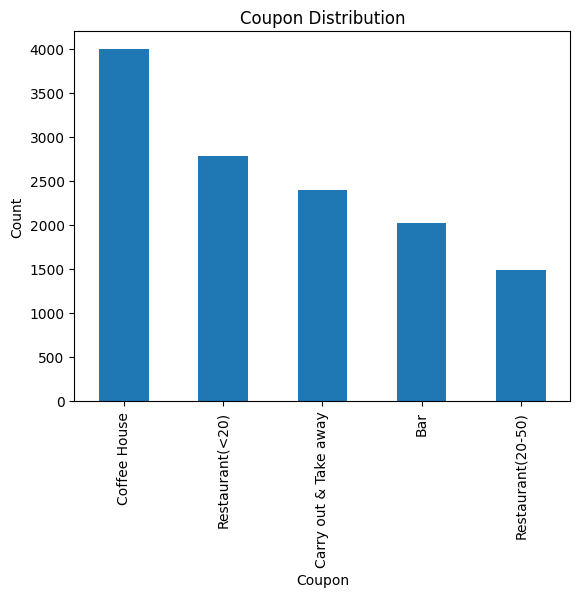

In [132]:
df['coupon'].replace({v: k for k, v in categorical_mapping['coupon'].items()}).value_counts().plot(kind='bar')
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.title('Coupon Distribution')
plt.show()


6. Use a histogram to visualize the temperature column.

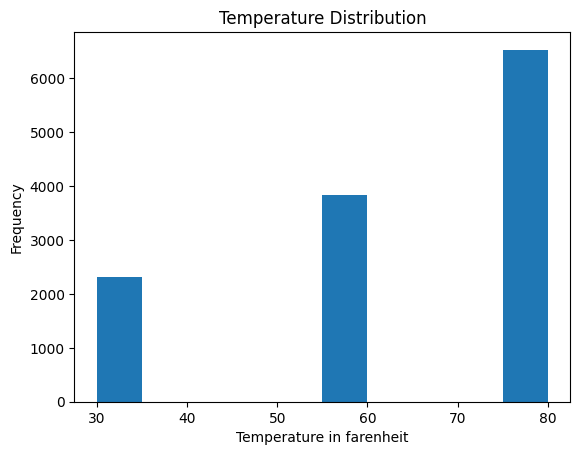

In [133]:
plt.hist(df['temperature'], bins=10)
plt.xlabel('Temperature in farenheit')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [134]:
bar_coupons_df = df['coupon'].replace({v: k for k, v in categorical_mapping['coupon'].items()})
bar_coupons_df.head()




0          Restaurant(<20)
1             Coffee House
2    Carry out & Take away
3             Coffee House
4             Coffee House
Name: coupon, dtype: object

2. What proportion of bar coupons were accepted?


In [135]:

bar_count = df.query("coupon == 'Bar'").count()  # count of bar coupons
bar_accepted = df.query("coupon == 'Bar' and Y == 1").count() # count of bar coupons accepted


proportion_accepted = bar_accepted / bar_count # calcualte proportion of bar coupons accepted
proportion_accepted = proportion_accepted.iloc[0] * 100 # convert to percentage
print(f"Proportion of Bar coupons that were accepted: {proportion_accepted:.2f}%")




Proportion of Bar coupons that were accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  